In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,5)

In [3]:
data = pd.read_csv(r"D:\ExcelR Assignments\Question\Timeseries\Timeseries\exchange_rate.csv", index_col = 0, parse_dates=True) 

In [4]:
data

,Ex_rate
date,
1990-01-01,0.785500
1990-02-01,0.781800
1990-03-01,0.786700
1990-04-01,0.786000
1990-05-01,0.784900
...,...
2010-06-10,0.718494
2010-07-10,0.721839
2010-08-10,0.723197


In [5]:
data = data.sort_index()

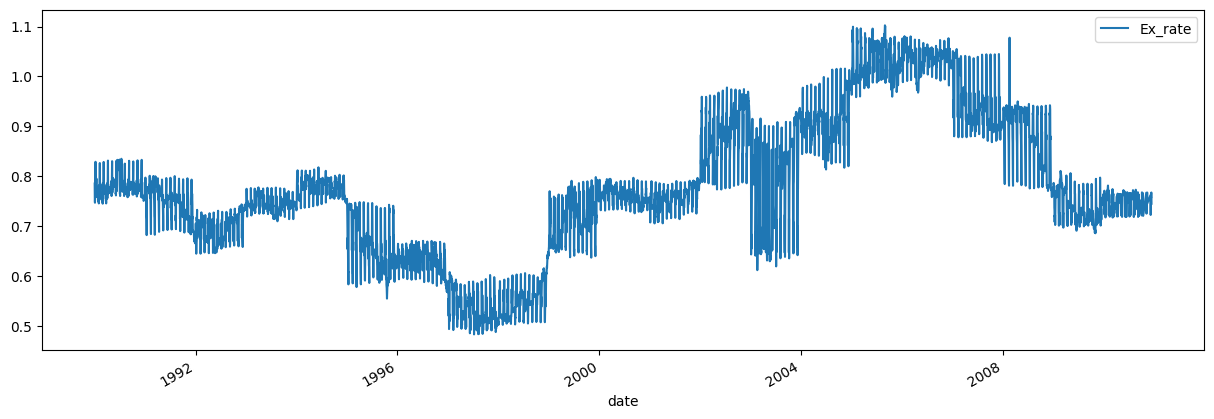

In [7]:
data.plot();

In [7]:
data.duplicated().sum()

2258

In [8]:
data['Ex_rate'].duplicated().sum()

2258

In [9]:
data.index.duplicated().sum()

0

### Hypothesis Test for data

In [10]:
adfuller(data['Ex_rate'])[1]  # to get only p-value 

0.6474818205329451

In [11]:
data

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.750000
1990-01-03,0.747100
1990-01-04,0.758700
1990-01-05,0.785200
...,...
2010-12-05,0.760427
2010-12-06,0.756344
2010-12-07,0.765931


In [12]:
data_diff = data['Ex_rate'].diff().dropna()

In [13]:
adfuller(data_diff)[1]  # to get only p-value

0.0

In [14]:
data

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.750000
1990-01-03,0.747100
1990-01-04,0.758700
1990-01-05,0.785200
...,...
2010-12-05,0.760427
2010-12-06,0.756344
2010-12-07,0.765931


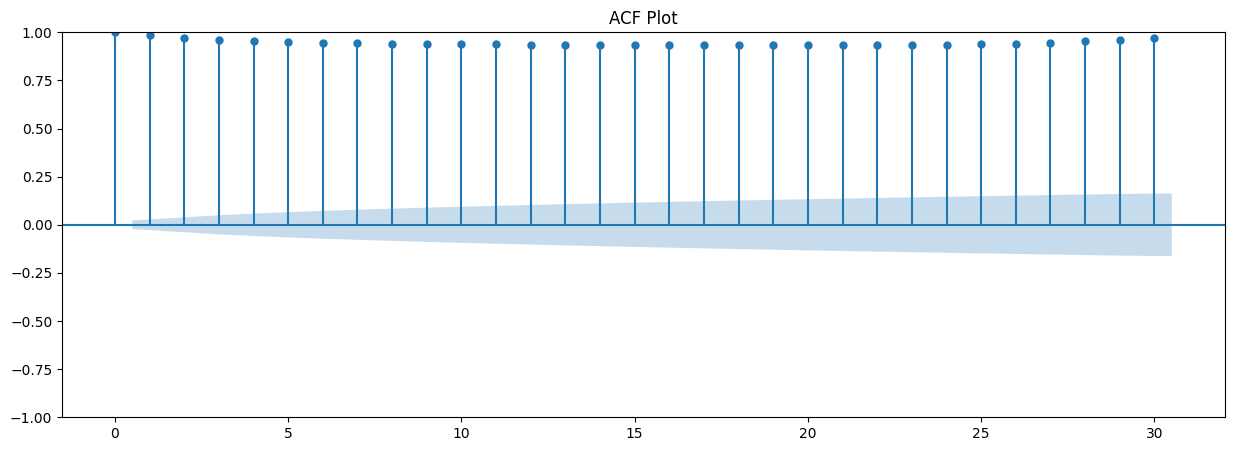

In [15]:
plot_acf(data['Ex_rate'], lags=30)
plt.title('ACF Plot')
plt.show()

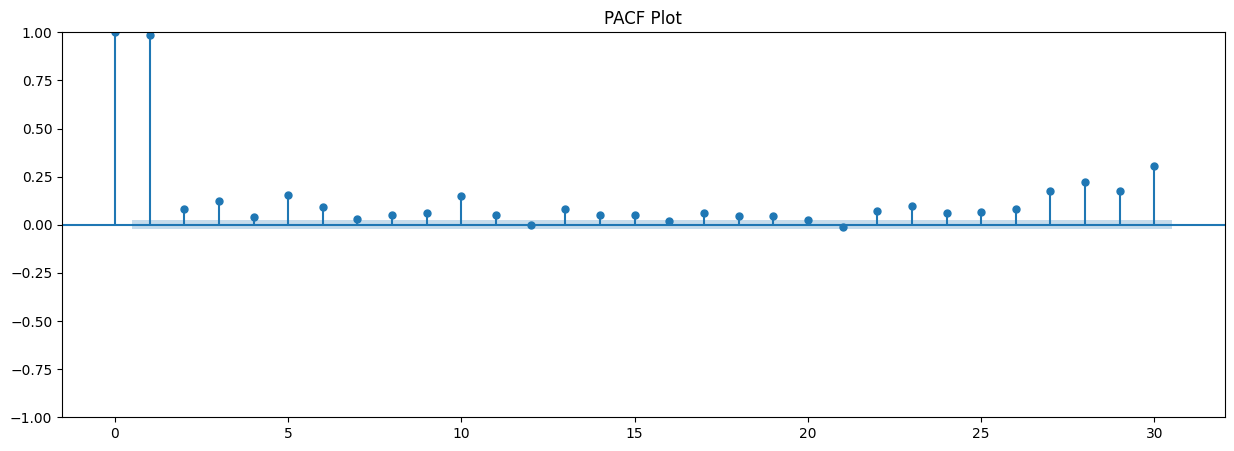

In [16]:
plot_pacf(data['Ex_rate'], lags=30)
plt.title('PACF Plot')
plt.show()

In [17]:
order = auto_arima(data['Ex_rate'])

In [18]:
order

ARIMA(order=(4, 1, 5), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [19]:
data.shape

(7588, 1)

In [20]:
train = data.iloc[:-50]
test =  data.iloc[-50:]

In [21]:
train = train.sort_index()
test = test.sort_index()

In [22]:
train.shape,test.shape

((7538, 1), (50, 1))

In [35]:
model = ARIMA(train['Ex_rate'], order = (4,1,5)).fit()

In [36]:
len(test)

50

In [37]:
ypred = model.forecast(steps=len(test))

In [38]:
len(ypred)

50

In [39]:
print(mean_squared_error(test['Ex_rate'], ypred))

0.00024024954310876304


In [40]:
print(np.sqrt(mean_squared_error(test['Ex_rate'], ypred)))

0.015499985261565994


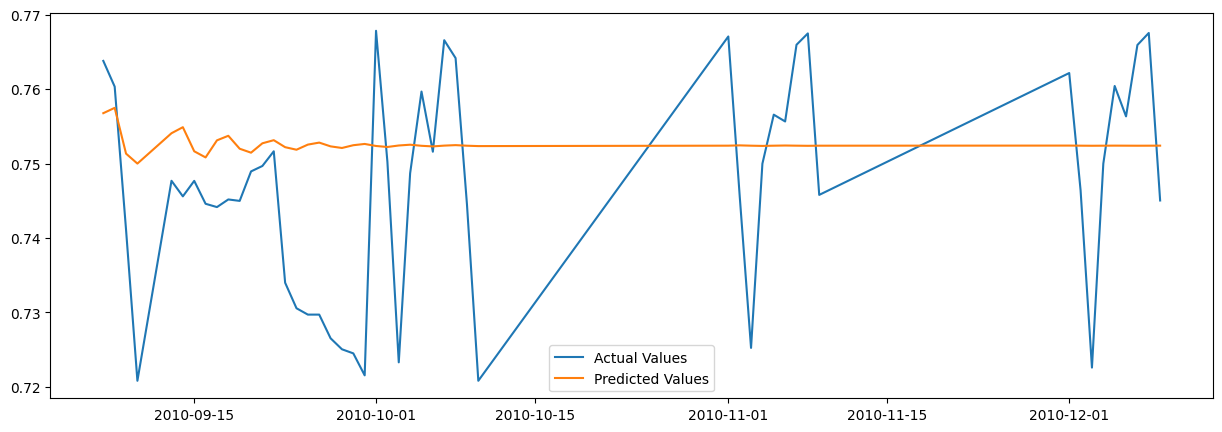

In [42]:
plt.plot(test.index, test['Ex_rate'], label = 'Actual Values')
plt.plot(test.index, ypred, label = 'Predicted Values')
plt.legend()

In [56]:
es = ExponentialSmoothing(train['Ex_rate']).fit()

In [57]:
y_pred_es = es.forecast(steps = 50)

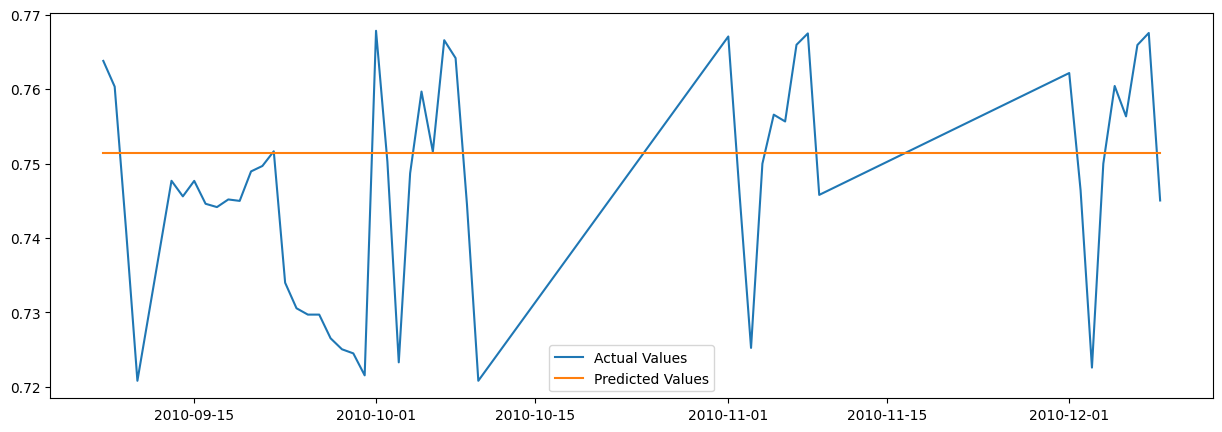

In [61]:
plt.plot(test.index, test['Ex_rate'], label = 'Actual Values')
plt.plot(test.index, y_pred_es, label = 'Predicted Values')
plt.legend()

In [63]:
print(mean_squared_error(test['Ex_rate'], y_pred_es))

0.0002344378243748427
